In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import pandas as pd

In [5]:
im = rgb2gray(plt.imread('domino_test.jpg'))

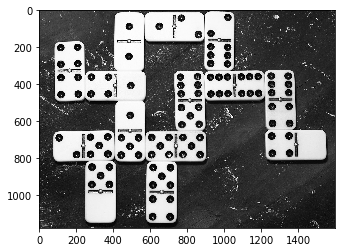

In [6]:
plt.imshow(im, cmap='gray')

In [25]:
dot = im[181:225, 95:140]

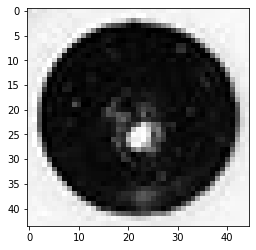

In [26]:
plt.imshow(dot, cmap='gray')

In [27]:
from skimage.feature import match_template

In [30]:
result = match_template(im, dot)

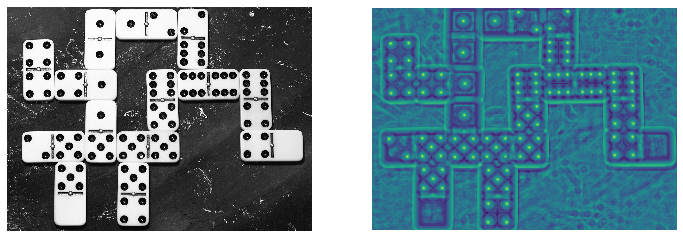

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(result)

In [34]:
from skimage.filters import rank
from skimage.morphology import disk

In [39]:
im_max = rank.maximum(result, selem=disk(5))

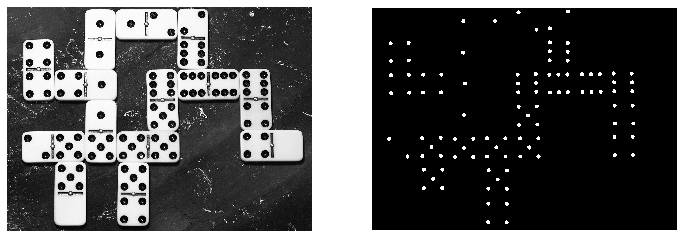

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

for ax in axes:
    ax.axis('off')
    
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_max>150, cmap='gray')

In [43]:
from skimage.measure import label, regionprops_table

In [44]:
im_l = label(im_max>150)

In [47]:
points = regionprops_table(im_l, properties=('label', 'area'))

In [50]:
data = pd.DataFrame(points)

In [51]:
data

,label,area
0,1,316
1,2,311
2,3,302
3,4,311
4,5,314
...,...,...
95,96,323
96,97,315
97,98,324
98,99,319
